# Step 1. Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the one with numeric columns
data = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

# Creating a Hit column to make this work
# If the game (Global_Sales) hit is greater than 1 million, it's a hit (1), if not it's 0
data["Hit"] = (data["Global_Sales"] > 1).astype(int)

# Choosing what features and what's the target
x = data[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Hit"]

# Now spliting data to training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2. Training Model

In [2]:
# This part will teach the model on how to find patterns
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 3. Making predictions

In [3]:
# Purpose of this one is to see how it can guess correctly
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100,2), "%")

Accuracy: 99.76 %


# Step 4. Visualization

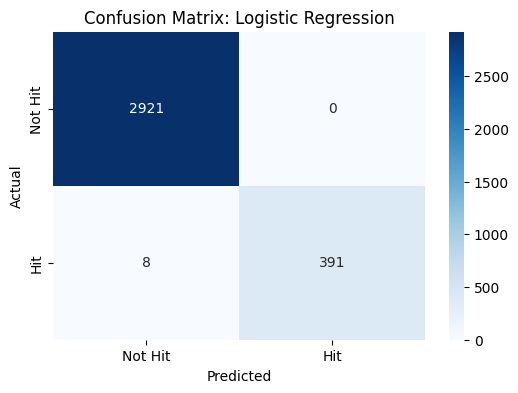

In [4]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Hit", "Hit"], yticklabels=["Not Hit", "Hit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Step 5. Checking if the feature matter

In [5]:
print(y.unique())
print(len(y.unique()))

[1 0]
2


In [6]:
print("X columns:", len(x.columns))
print("Model coef shape:", model.coef_.shape)

X columns: 4
Model coef shape: (1, 4)


In [7]:
print("Features used:", x.columns.tolist())
x.info()

Features used: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16598 non-null  float64
 1   EU_Sales     16598 non-null  float64
 2   JP_Sales     16598 non-null  float64
 3   Other_Sales  16598 non-null  float64
dtypes: float64(4)
memory usage: 518.8 KB


In [8]:
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")
data = data.dropna(subset=["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])
X = data[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = (data["Global_Sales"] > 1).astype(int) 

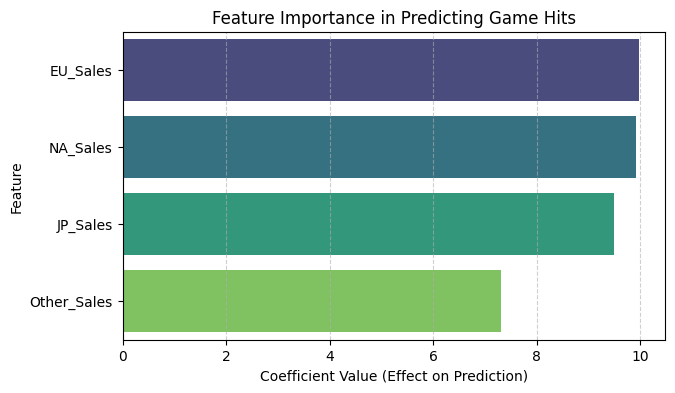

       Feature  Coefficient
1     EU_Sales     9.979410
0     NA_Sales     9.910794
2     JP_Sales     9.485091
3  Other_Sales     7.318837


In [9]:
# Creating a DataFrame
coefs = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Nicely plot
plt.figure(figsize=(7,4))
sns.barplot(data=coefs, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance in Predicting Game Hits")
plt.xlabel("Coefficient Value (Effect on Prediction)")
plt.ylabel("Feature")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.show()

# Displaying the coefficients
print(coefs)

In [10]:
predictions = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
predictions["Predicted_Label"] = predictions["Predicted"].map({1: "Hit", 0: "Not Hit"})
print(predictions.head(60))

       Actual  Predicted Predicted_Label
8928        0          0         Not Hit
4789        0          0         Not Hit
15492       0          0         Not Hit
14767       0          0         Not Hit
5211        0          0         Not Hit
720         1          1             Hit
4918        0          0         Not Hit
3107        0          0         Not Hit
7416        0          0         Not Hit
4447        0          0         Not Hit
2157        0          0         Not Hit
10762       0          0         Not Hit
12217       0          0         Not Hit
3421        0          0         Not Hit
11598       0          0         Not Hit
6945        0          0         Not Hit
9613        0          0         Not Hit
14478       0          0         Not Hit
10390       0          0         Not Hit
11298       0          0         Not Hit
409         1          1             Hit
8215        0          0         Not Hit
13017       0          0         Not Hit
327         1   

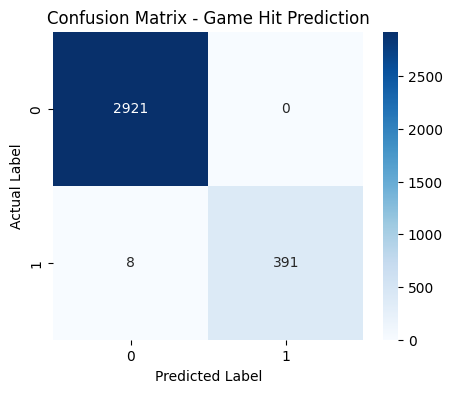

In [11]:
# To summarize the model
cm = confusion_matrix(y_test, model.predict(X_test))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Game Hit Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

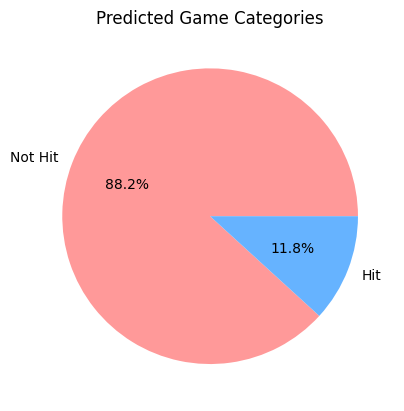

In [12]:
#Pie chart 
labels = ["Not Hit", "Hit"]
counts = pd.Series(y_pred).value_counts()
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
plt.title("Predicted Game Categories")
plt.show()

# Step 6. Reflection

For this part I used logistic regression to see if a video game is a hit (1) or not a hit (0), and it's based on regional sales. Logistic regression works for classification issues, and it helps show a result like "yes" or "no," unlike linear regression, which predicts continuous values.

I first started developing the data and making the global sales into a binary variable, where values like 1 million sold are labeled as hits (1). I implemented a feature where North America, Europe, Japan, and other regions guess the outcome of sales. After that I divided the data into two training and testing sets, then trained my model by implementing scikit-learn's logistic regression function.

After I trained the model, I tested the accuracy with a classification report and implemented a confusion matrix. And the results were good, showing that the model has correctly checked what game is considered a hit or not a hit. And again I implemented a visualization to show which region had the biggest impact on a game's success. The model showed that Europe and North America are the strongest predictors, which makes sense given how big their market size is.

But after checking the results, I again realized the accuracy might be higher than what I'm expecting because the regional sales already have direct global sales. Meaning that the model doesn't have to guess that much because it is straightforward. This experiment helped me see that sometimes a high accuracy score doesn't mean the model is perfect; it can mean the dataset I picked makes the problem easy.

This experiment helped me learn how the process of building a classification model works, evaluating it with precision and recall, and how to interpret coefficients as indicators of features. I also now know how to see beyond accuracy and see what the model is truly learning. If I have to do this again, I would add another dataset or maybe change the problem definition to make the model more challenging; for instance, predicting the future hit game according to the early trends in sales or maybe non-sales, like genre or platforms.